<hr>

***Version: 1001.1392024.qut.cs.tnl***

***Sk Tanzir Mehedi, PhD Student, QUT***

***Supervisory Team: Prof. Raja Jurdak & Dr Chadni Islam***
<hr>

**----Start of Step 1 Analysis----**

In [25]:
import pandas as pd

file_path = 'MaliciousPackageNameAndVersion.xlsx'
xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name='MaliciousPackageNameAndVersion')

df.head()

,Malicious Package Name,Malicious Package Version
0,10Cent10,999.0.4
1,10Cent11,999.0.4
2,11cent,999.0.0
3,11cent,999.0.1
4,11cent,999.0.2


In [26]:
# 1. Total number of rows
total_rows = df.shape[0]

# 2. Number of unique package names (already calculated)
unique_packages_count = df['Malicious Package Name'].nunique()

# 3. Number of unique versions
unique_versions_count = df['Malicious Package Version'].nunique()

# 4. Packages with the most versions
package_version_counts = df['Malicious Package Name'].value_counts().nlargest(5)

# 5. Most common versions
most_common_versions = df['Malicious Package Version'].value_counts().nlargest(5)

# 6. Check for any missing values
missing_values = df.isnull().sum()

# Prepare a summary of insights
insights = {
    "Total number of rows": total_rows,
    "Number of unique packages": unique_packages_count,
    "Number of unique versions": unique_versions_count,
    "Top 5 packages with the most versions": package_version_counts.to_dict(),
    "Top 5 most common versions": most_common_versions.to_dict(),
    "Missing values per column": missing_values.to_dict()
}

insights

{'Total number of rows': 7127,
 'Number of unique packages': 6091,
 'Number of unique versions': 1500,
 'Top 5 packages with the most versions': {'bytedtrace': 41,
  'xcryptography': 30,
  'important-package': 24,
  'sentinelone': 21,
  'pptest': 21},
 'Top 5 most common versions': {'1.0.0': 1046,
  '0.1': 994,
  '1.0': 213,
  '0.0.1': 193,
  '0.0.0': 177},
 'Missing values per column': {'Malicious Package Name': 0,
  'Malicious Package Version': 0}}

In [28]:
import matplotlib.pyplot as plt

# Prepare data for analysis
package_name_counts = df['Malicious Package Name'].value_counts()
version_counts = df['Malicious Package Version'].value_counts()

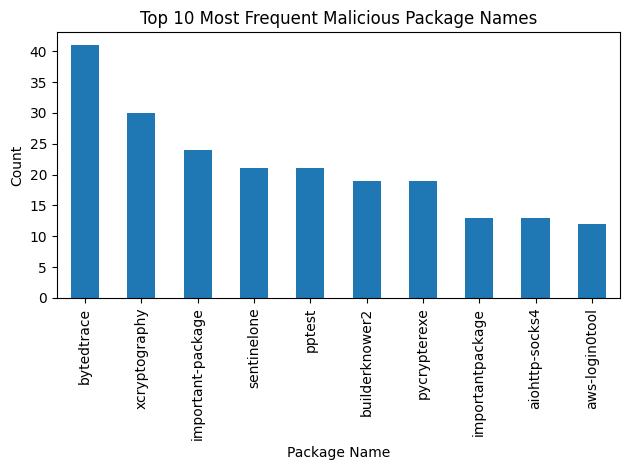

In [31]:
# Graph: Top 10 most frequent Malicious Package Names
plt.figure()
package_name_counts.head(10).plot(kind='bar', title='Top 10 Most Frequent Malicious Package Names', xlabel='Package Name', ylabel='Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 10 most frequent Malicious Package Names.png', dpi=600)
plt.show()

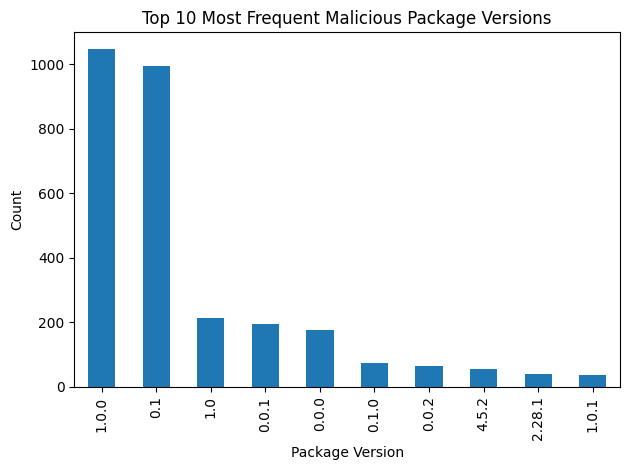

In [32]:
# Graph: Top 10 most frequent Malicious Package Versions
plt.figure()
version_counts.head(10).plot(kind='bar', title='Top 10 Most Frequent Malicious Package Versions', xlabel='Package Version', ylabel='Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 10 most frequent Malicious Package Versions.png', dpi=600)
plt.show()

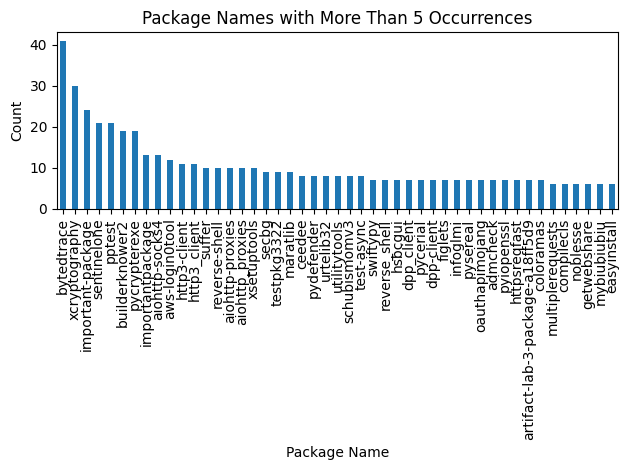

In [33]:
# Graph: Package Names with more than 5 occurrences
plt.figure()
package_name_counts[package_name_counts > 5].plot(kind='bar', title='Package Names with More Than 5 Occurrences', xlabel='Package Name', ylabel='Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Package Names with more than 5 occurrences.png', dpi=600)
plt.show()

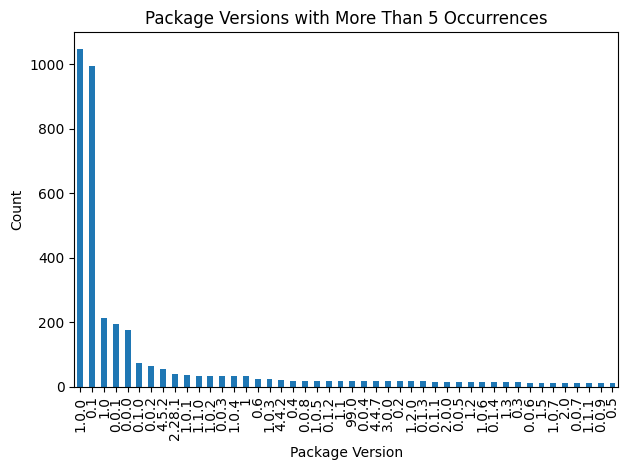

In [34]:
# Graph: Package Versions with more than 10 occurrences
plt.figure()
version_counts[version_counts > 10].plot(kind='bar', title='Package Versions with More Than 5 Occurrences', xlabel='Package Version', ylabel='Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Package Versions with more than 10 occurrences.png', dpi=600)
plt.show()

**Some observations:**

1. High concentration of common versions:

A significant portion of the dataset (over 14% for the two most common versions) uses generic version numbers like 1.0.0 (1,046 occurrences) and 0.1 (994 occurrences). This suggests that attackers might often assign placeholder or default version numbers to these packages, potentially making detection of malicious versions harder since these are commonly seen in legitimate packages as well.

2. Skewed distribution in package versions:

The number of versions per package is heavily skewed, with most packages having only a single version while a few (like bytedtrace with 41 versions) have a disproportionately high number of versions. This could indicate that certain malicious packages are evolving rapidly, possibly to evade detection through frequent updates.


3. Possible versioning patterns:

The most common versions like 1.0.0, 0.1, 0.0.1, and 0.0.0 are indicative of developers using basic, unpolished, or first-release versioning, which might hint that many malicious packages mimic early-stage or experimental software to avoid scrutiny.


4. Suspicious package naming trends:

Packages like "important-package" and "xcryptography" show up with multiple versions. The naming suggests these could be impersonating or mimicking widely trusted or necessary-sounding libraries to trick users or developers into trusting them. This is a common tactic in supply chain attacks, where attackers name packages to resemble legitimate ones.


5. Targeting of security-related names:

Packages like "xcryptography" and "sentinelone" (likely referencing SentinelOne, a known cybersecurity company) seem to target security-conscious users or developers. Malicious actors might be leveraging the trust that comes with these names to distribute compromised versions of legitimate-sounding software.


7. Potential lack of version control in malicious packages:
   
The frequent use of common version numbers (e.g., 0.1 or 1.0) across a wide variety of packages may indicate that these malicious packages are not being rigorously version-controlled like legitimate software. This could point to a lower level of professional management behind these packages or deliberate efforts to obfuscate their development history.

**----End of Step 1 Analysis----**